# The Sparks Foundation: Data Science and Business Analytics Intern

## Author: Purvit Vashishtha

## Task 7

### Problem Statement: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

# Data Preprocessing

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# importing dataset
df = pd.read_csv("india-news-headlines.csv")

In [3]:
# lets have a look at dataset
df.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [4]:
# changing column names
df = df.rename(columns={"publish_date":"Date","headline_category":"Category","headline_text":"News"})

In [5]:
# checking dataset with new column names
df.head()

,Date,Category,News
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [6]:
#checking for null values
df.isnull().sum()

Date        0
Category    0
News        0
dtype: int64

In [7]:
# datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Date      int64 
 1   Category  object
 2   News      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [8]:
#shape of our dataset
df.shape

(3297172, 3)

In [9]:
import pandas_datareader as pdr
stock_data = pdr.get_data_yahoo('AMZN', start='2017-01-1',end='2020-12-15')
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983
2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993
2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012
2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990
2017-01-09,801.770020,791.770020,798.000000,796.919983,3446100,796.919983


In [10]:
# saving data to another file
stock_data.to_csv('amzn.csv')

In [11]:
# reading new dataset
df1 = pd.read_csv("amzn.csv")

In [12]:
df1.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983
1,2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993
2,2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012
3,2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990
4,2017-01-09,801.770020,791.770020,798.000000,796.919983,3446100,796.919983


# Data Visualization

In [14]:
# setting index of dataframe as "Close" column
df_1 = df1.reset_index()['Close']
df_1.head()

0    753.669983
1    757.179993
2    780.450012
3    795.989990
4    796.919983
Name: Close, dtype: float64

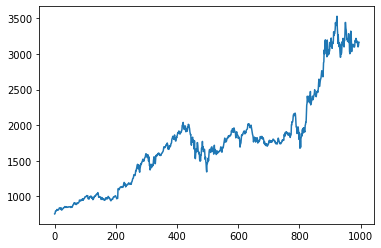

In [15]:
#visualizing df_1
plt.plot(df_1)

# Feature Engineering

In [19]:
# Scaling data df_1 using MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_1 = scaler.fit_transform(np.array(df_1).reshape(-1,1))

In [21]:
df_1[:6]

array([[0.        ],
       [0.0012636 ],
       [0.0096408 ],
       [0.01523519],
       [0.01556999],
       [0.0152028 ]])

In [22]:
# defining training and testing size
train_size=int(len(df_1)*0.65)
test_size=len(df_1)-train_size
train_data,test_data=df_1[0:train_size,:],df_1[train_size:len(df_1),:1]

In [23]:
# creatning a function that will create dataset for model
def create_dataset(dataset, time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [24]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [25]:
X_train.shape

(546, 100)

In [27]:
# changing shape of data for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [28]:
print(X_train.shape)
print(X_test.shape)

(546, 100, 1)
(248, 100, 1)


# Deep Learning Model

In [31]:
# importing deep learning library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error")

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=40,batch_size=64, verbose=1)

Epoch 1/40
9/9 [==============================] - 9s 380ms/step - loss: 0.0523 - val_loss: 0.0054
Epoch 2/40
9/9 [==============================] - 2s 181ms/step - loss: 0.0057 - val_loss: 0.0606
Epoch 3/40
9/9 [==============================] - 2s 197ms/step - loss: 0.0034 - val_loss: 0.0154
Epoch 4/40
9/9 [==============================] - 2s 179ms/step - loss: 0.0017 - val_loss: 0.0211
Epoch 5/40
9/9 [==============================] - 2s 179ms/step - loss: 0.0012 - val_loss: 0.0076
Epoch 6/40
9/9 [==============================] - 2s 178ms/step - loss: 7.4992e-04 - val_loss: 0.0039
Epoch 7/40
9/9 [==============================] - 2s 179ms/step - loss: 8.2605e-04 - val_loss: 0.0064
Epoch 8/40
9/9 [==============================] - 2s 213ms/step - loss: 7.7338e-04 - val_loss: 0.0049
Epoch 9/40
9/9 [==============================] - 2s 191ms/step - loss: 6.9225e-04 - val_loss: 0.0062
Epoch 10/40
9/9 [==============================] - 2s 184ms/step - loss: 7.0429e-04 - val_loss: 0.0066

# Prediction through model

In [35]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [36]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1541.4537568099508

In [39]:
math.sqrt(mean_squared_error(y_test, test_predict))

2425.5529107048246

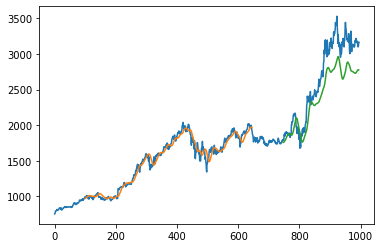

In [40]:
look_back=100
trainpredictplot=np.empty_like(df_1)
trainpredictplot[:, :]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#shif test predict for plot
testpredictplot=np.empty_like(df_1)
testpredictplot[:, :]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df_1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df_1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

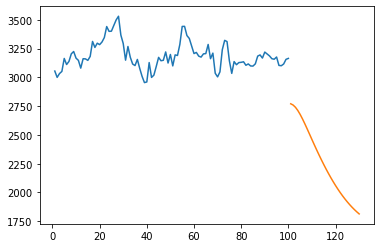

In [42]:
x_input=test_data[248:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array
lst_output=[]
n_steps= 100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

plt.plot(day_new,scaler.inverse_transform(df_1[896:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output));

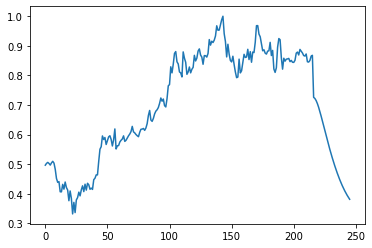

In [43]:
df3=df_1.tolist()
df3.extend(lst_output)
plt.plot(df3[780:]);

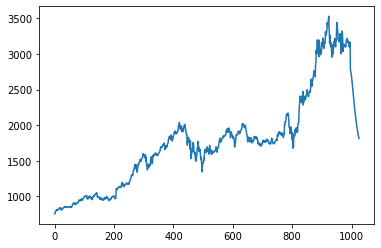

In [44]:

df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)